In [9]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('mosquito_indicator.csv')
df = df[['mosquito_Indicator','rain(mm)','min_T(℃)','max_T(℃)']]
df.head()

,mosquito_Indicator,rain(mm),min_T(℃),max_T(℃)
0,254.4,0.0,12.2,26.0
1,273.5,16.5,16.5,28.4
2,304.0,27.0,8.9,17.6
3,256.2,0.0,10.2,20.6
4,243.8,7.5,10.2,26.9


In [4]:
df.describe()

,mosquito_Indicator,rain(mm),min_T(℃),max_T(℃)
count,1342.000000,1342.000000,1342.000000,1342.000000
mean,251.991803,3.539866,10.005663,19.096870
std,295.871336,13.868106,11.109489,11.063394
min,0.000000,0.000000,-17.800000,-10.700000
25%,5.500000,0.000000,0.300000,9.300000
50%,91.900000,0.000000,11.500000,21.900000
75%,480.400000,0.400000,19.500000,28.175000
max,1000.000000,144.500000,30.300000,39.600000


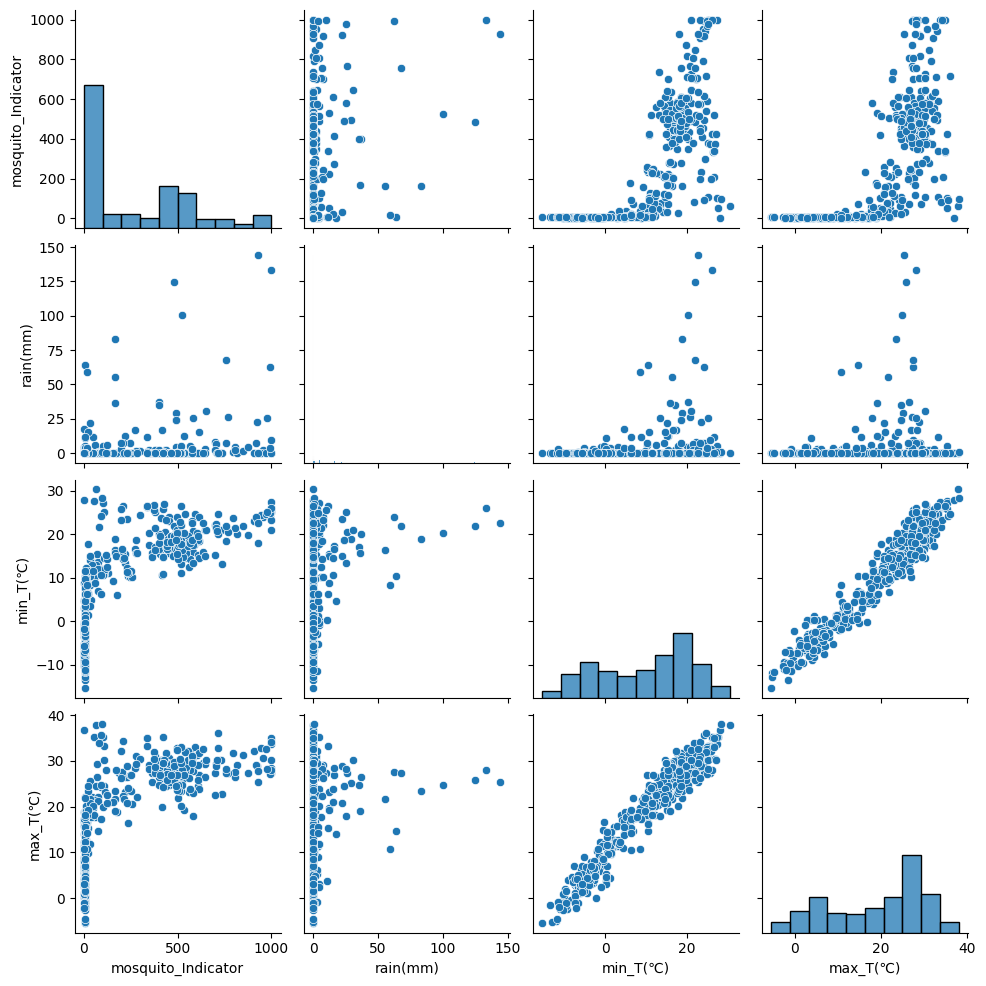

In [5]:
import seaborn as sns

sns.pairplot(df.sample(frac=0.3))

In [6]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X = df.values[:, 1:]
y = df.values[:, 0]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

model_ols = linear_model.LinearRegression()
model_ols.fit(X_train, y_train)
mean_absolute_error(y_test, model_ols.predict(X_test))

154.8844916671464

In [8]:
model_ols.predict(np.array([20, 24, 36]).reshape(1, -1))

array([527.79290872])

In [9]:
import pickle

pickle.dump(model_ols, open('model.pkl', 'wb'))
model_ols = pickle.load(open('model.pkl', 'rb'))
mean_absolute_error(y_test, model_ols.predict(X_test))

154.8844916671464

In [11]:
model_ols.predict(np.array([20, 24, 36]).reshape(1, -1))

array([527.79290872])

In [8]:
import pandas as pd
import math

out_df = pd.DataFrame()
df = pd.read_excel('../scripts/korea_latlon.xlsx', sheet_name=None)
df = pd.concat(df.values())
df = out_df.append(df,ignore_index=True)
df = df.loc[~pd.isnull(df['읍면동/구'])]
d = {k: f.groupby('시군구')['읍면동/구'].apply(list).to_dict()
     for k, f in df.groupby('시도')}

/var/folders/wk/s4l3gts11kdds9_s1z9qghk80000gn/T/ipykernel_5157/4130197494.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = out_df.append(df,ignore_index=True)
